In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


berkshire3_df = pd.read_excel('Berkshire3.xlsx')
berkshire4_df = pd.read_excel('Berkshire4.xlsx')
berkshire3_df.head()
berkshire4_df.head()

,Status,Nmbr Cs,Id Prsn Dfndnt,Offense Dt,Court Code,Chrg Cnt,Chrg Code,Chrg Desc,Case Type,Crime Type,...,Min Actl Jail Imp Term Unt,Max Actl Jail Imp Term,Max Actl Jail Imp Unt,Code Fclty,Min Imp Cmnty Srvc Term,Min Imp Cmnty Srvc Unt,Max Imp Cmnty Srvc,Max Imp Cmnty Srvc Unt,Text Cmnt,Desc Ofcr Agncy
0,Closed,19-05-103518,24840,1992-02-29 00:00:00,CBDC,1,266/37/B,LARCENY BY CHECK UNDER $250 c266 §37 & §30(1),Larceny,Larceny By Check,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,Private Complaint
1,Closed,19-05-103519,24840,1992-02-01 00:00:00,CBDC,1,266/37/B,LARCENY BY CHECK UNDER $250 c266 §37 & §30(1),Larceny,Larceny By Check,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,Private Complaint
2,Closed,19-08-104806,24840,2019-07-09 00:00:00,GBDC,1,90/10/A,UNLICENSED OPERATION OF MV c90 §10,Motor Vehicle,Unlicensed,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Lee
3,Closed,19-08-104806,24840,2019-07-09 00:00:00,GBDC,2,90/7/D,"EQUIPMENT VIOLATION, MISCELLANEOUS MV * c90 §7",Motor Vehicle,Unlicensed,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Lee
4,Closed,19-04-103189,24867,2019-04-06 00:00:00,NADC,1,94C/34/D,"DRUG, POSSESS CLASS B, SUBSQ.OFF. c94C §34",Narcotics,Possession of Narcotics,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,North Adams Police Department


In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

berkshire3_df = pd.read_excel('Berkshire3.xlsx')
berkshire4_df = pd.read_excel('Berkshire4.xlsx')
berkshire_total = pd.concat([berkshire3_df, berkshire4_df])

df = berkshire_total[["Chrg Cnt", "Chrg Desc", "Case Type", "Crime Type", "Race", "Gender", "Disp Type", "Disp Desc", "Sentence Translation"]]
df2 = df[['Race', 'Gender','Case Type','Crime Type' ,'Disp Type', 'Disp Desc', 'Sentence Translation']]
corr = df2.corr()
corr
corr.style.background_gradient(cmap='coolwarm')




/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23405/3859793279.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23405/2622802482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')


W        52757
B         8968
Other     1808
H         1727
A          196
Name: Race, dtype: int64


<AxesSubplot: >

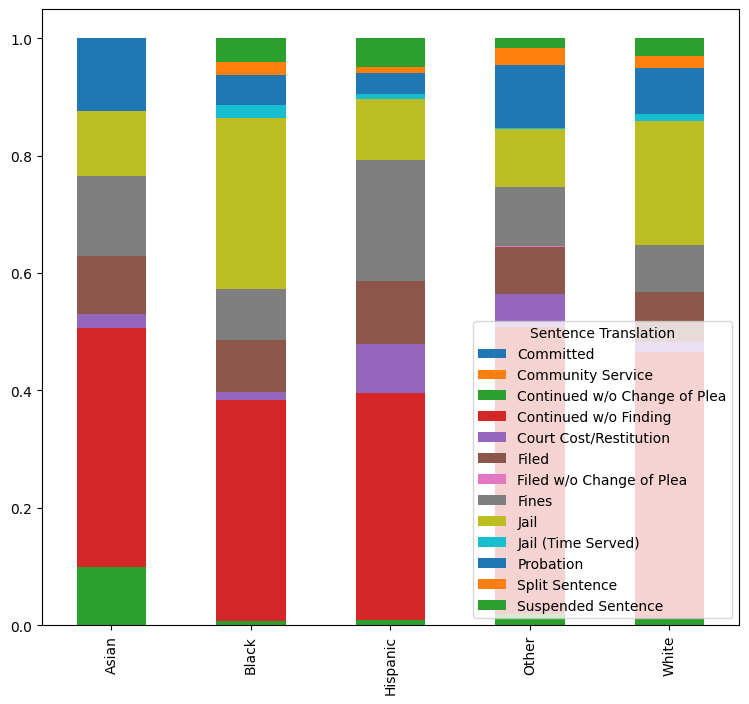

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

df = berkshire3_df[["Chrg Cnt", "Chrg Desc", "Case Type", "Crime Type", "Race", "Gender", "Disp Type", "Disp Desc", "Sentence Translation"]]

df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')
print(df["Race"].value_counts())
grouped = df.groupby(['Race','Sentence Translation']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0)


grouped.index = ['Asian', 'Black', 'Hispanic', 'Other', 'White']

grouped.plot(kind = "bar", stacked = True, figsize=(9, 8))


/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23405/890914531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Race'] = new_df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')


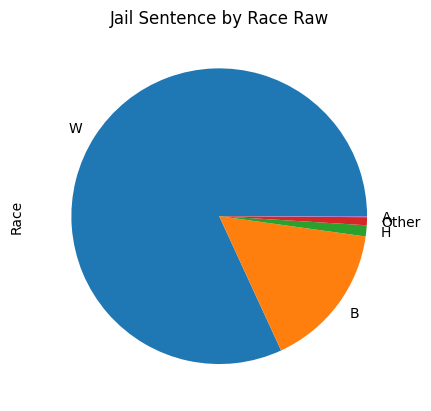

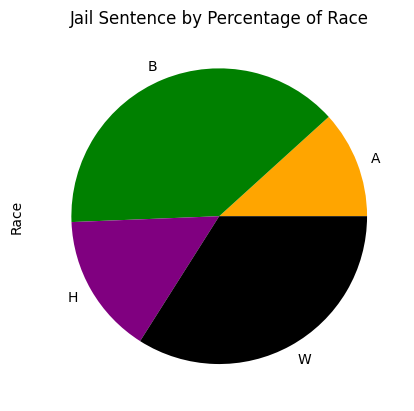

In [127]:
df = berkshire3_df[["Chrg Cnt", "Chrg Desc", "Case Type", "Crime Type", "Race", "Gender", "Disp Type", "Disp Desc", "Sentence Translation"]]

df['Race'].value_counts()
new_df = df.loc[df['Sentence Translation'] == 'Jail']
new_df['Race'] = new_df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')
new_df.head()
new_df['Race'].value_counts()

(new_df['Race'].value_counts()).plot.pie(y='Race', title="Jail Sentence by Race Raw") 
plt.show()
(new_df['Race'].value_counts()/df['Race'].value_counts()).plot.pie(y='Race', title="Jail Sentence by Percentage of Race", colors = ['orange', 'green', 'green', 'black', 'purple'])
plt.show()

/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23405/3040757128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C', 'M', 'BR', 'A', 'H'], 'Other')
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23405/3040757128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disp Desc'] = df['Disp Desc'].replace(['Dismissed - Show Cause', 'Dismissed - Transfered to Sup Ct', 'Dismissed Without Prejudice COVID19','Dismissed/Indicted/Arraigne

W        52757
B         8968
Other     3731
Name: Race, dtype: int64


<AxesSubplot: >

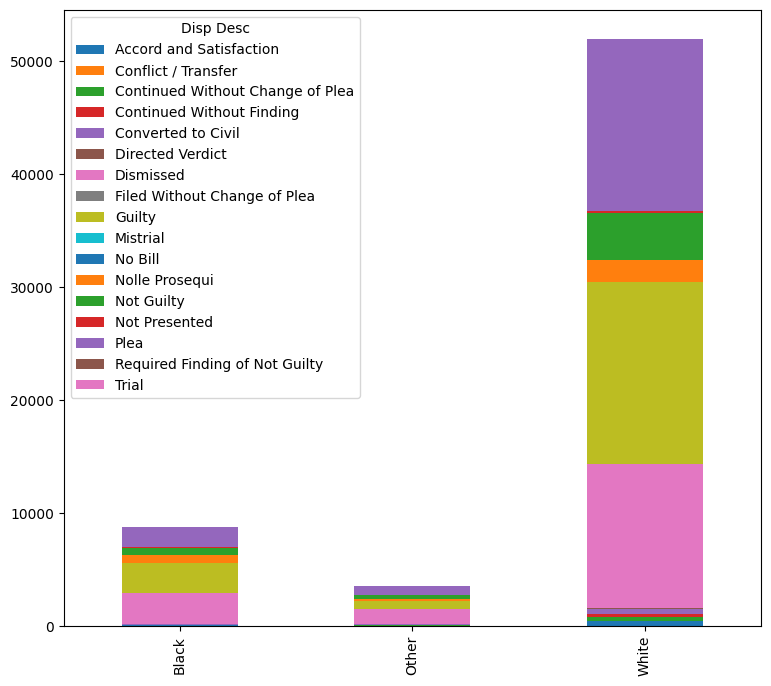

In [121]:
df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C', 'M', 'BR', 'A', 'H'], 'Other')
df['Disp Desc'] = df['Disp Desc'].replace(['Dismissed - Show Cause', 'Dismissed - Transfered to Sup Ct', 'Dismissed Without Prejudice COVID19','Dismissed/Indicted/Arraigned' ], 'Dismissed')
df['Disp Desc'] = df['Disp Desc'].replace(['Not Guilty Insanity', 'Not Responsible'], 'Not Guilty')
df['Disp Desc'] = df['Disp Desc'].replace(['Admitted Facts Sufficient for a Finding of Guilty', 'Responsible'], 'Guilty')
print(df['Race'].value_counts())
grouped = df.groupby(['Race','Disp Desc']).size().unstack()

grouped.index = ['Black', 'Other', 'White']

grouped.plot(kind = "bar", stacked = True, figsize=(9, 8))

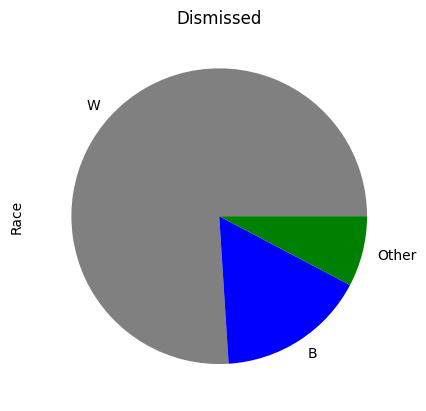

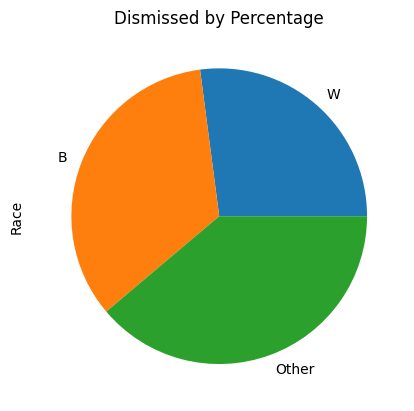

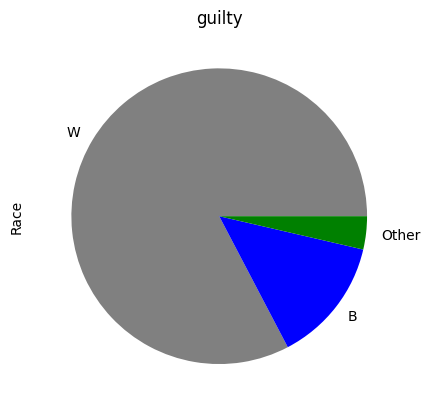

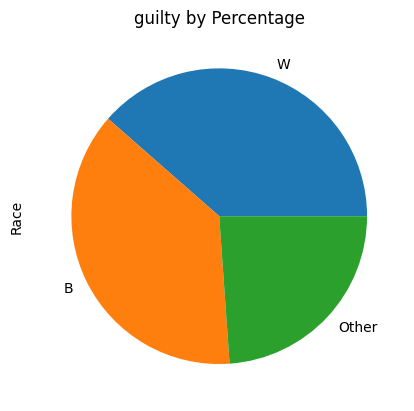

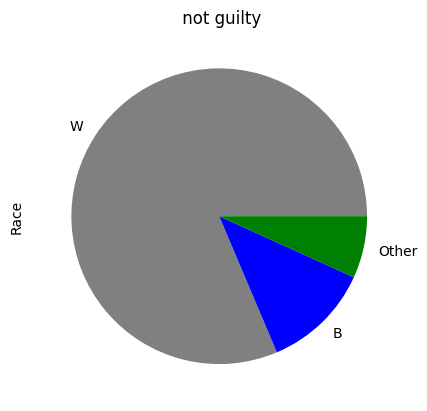

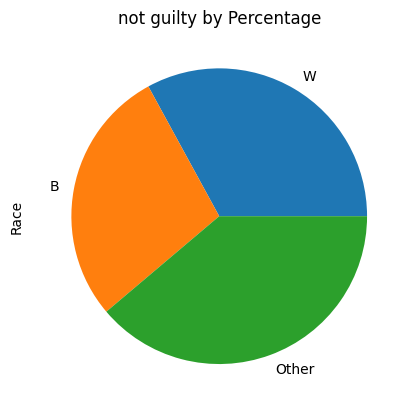

In [122]:
df['Race'].value_counts()
dismissed = df.loc[df['Disp Desc'] == 'Dismissed']
guilty = df.loc[df['Disp Desc'] == 'Guilty']
not_guilty = df.loc[df['Disp Desc'] == 'Not Guilty']
new_df = pd.concat([guilty,not_guilty,dismissed])
new_df['Race'] = new_df['Race'].replace(['U', 'I', 'EI', 'C'], 'xOther')

(dismissed['Race'].value_counts()).plot.pie(y='Race', title="Dismissed",colors = ['grey', 'blue', 'green', 'yellow', 'purple']) 
plt.show()
(dismissed['Race'].value_counts()/df['Race'].value_counts()).plot.pie(y='Race', title="Dismissed by Percentage")
plt.show()

(guilty['Race'].value_counts()).plot.pie(y='Race', title="guilty",colors = ['grey', 'blue', 'green', 'yellow', 'purple']) 
plt.show()
(guilty['Race'].value_counts()/df['Race'].value_counts()).plot.pie(y='Race', title="guilty by Percentage")
plt.show()

(not_guilty['Race'].value_counts()).plot.pie(y='Race', title=" not guilty",colors = ['grey', 'blue', 'green', 'yellow', 'purple']) 
plt.show()
(not_guilty['Race'].value_counts()/df['Race'].value_counts()).plot.pie(y='Race', title="not guilty by Percentage")
plt.show()